In [212]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
taxi = pd.read_csv('d:/2_taxi_nyc.csv', encoding = 'windows-1251')

In [60]:
taxi

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp 01,pcp 06,pcp 24,sd
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,Jan,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,Jan,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
3,2015-01-01 01:00:00,Jan,Manhattan,5258,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
4,2015-01-01 01:00:00,Jan,Queens,405,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,2015-06-30 23:00:00,Jun,EWR,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29097,2015-06-30 23:00:00,Jun,Manhattan,3828,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29098,2015-06-30 23:00:00,Jun,Queens,580,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29099,2015-06-30 23:00:00,Jun,Staten Island,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0


In [61]:
taxi = taxi.rename(columns = {'pcp 01':'pcp_01', 'pcp 06':'pcp_06', 'pcp 24':'pcp_24'})

In [62]:
pickups_all = taxi['pickups'].sum()

In [63]:
pickups_all

14265773

In [64]:
taxi['borough'].value_counts()

Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Name: borough, dtype: int64

In [65]:
# Task1

In [66]:
pickups_count = taxi \
    .groupby('borough', as_index=False) \
    .aggregate({'pickups':'sum'}) \
    .sort_values('pickups')

In [67]:
pickups_count

,borough,pickups
2,EWR,105
5,Staten Island,6957
0,Bronx,220047
4,Queens,1343528
1,Brooklyn,2321035
3,Manhattan,10367841


In [ ]:
#Task3

In [84]:
min_pickups = taxi \
    .groupby('borough') \
    .aggregate({'pickups':'sum'})\
    .idxmin()

In [85]:
min_pickups

pickups    EWR
dtype: object

In [115]:
pickups_hday_count = taxi \
    .groupby(['borough','hday'], as_index=False) \
    .aggregate({'pickups':'mean'}) \
    .sort_values('borough') \
    .round(2)

In [116]:
pickups_hday_count

,borough,hday,pickups
0,Bronx,N,50.77
1,Bronx,Y,48.07
2,Brooklyn,N,534.73
3,Brooklyn,Y,527.01
4,EWR,N,0.02
5,EWR,Y,0.04
6,Manhattan,N,2401.30
7,Manhattan,Y,2035.93
8,Queens,N,308.90
9,Queens,Y,320.73


In [135]:
holidays = taxi \
    .query("hday == 'Y'") \
    .groupby(['borough','hday'], as_index=False) \
    .aggregate({'pickups':'mean'})

In [136]:
holidays

,borough,hday,pickups
0,Bronx,Y,48.065868
1,Brooklyn,Y,527.011976
2,EWR,Y,0.041916
3,Manhattan,Y,2035.928144
4,Queens,Y,320.730539
5,Staten Island,Y,1.497006


In [137]:
works = taxi \
    .query("hday == 'N'") \
    .groupby(['borough','hday'], as_index=False) \
    .aggregate({'pickups':'mean'})

In [138]:
works

,borough,hday,pickups
0,Bronx,N,50.771073
1,Brooklyn,N,534.727969
2,EWR,N,0.023467
3,Manhattan,N,2401.302921
4,Queens,N,308.899904
5,Staten Island,N,1.606082


In [173]:
holidays['borough'][holidays['pickups'] > works['pickups']]

2       EWR
4    Queens
Name: borough, dtype: object

In [ ]:
# Task4 

In [191]:
pickups_by_mon_bor = taxi\
    .groupby(['pickup_month','borough'], as_index=False)\
    .agg({'pickups':'sum'})\
    .sort_values('pickups', ascending=False)
    

In [192]:
pickups_by_mon_bor

,pickup_month,borough,pickups
21,Jun,Manhattan,1995388
33,May,Manhattan,1888800
9,Feb,Manhattan,1718571
27,Mar,Manhattan,1661261
3,Apr,Manhattan,1648278
15,Jan,Manhattan,1455543
19,Jun,Brooklyn,482466
31,May,Brooklyn,476087
1,Apr,Brooklyn,378095
25,Mar,Brooklyn,346726


In [193]:
# Task5 (функция)

In [230]:
def temp_to_celcius(f):
    c = (f - 32)*5.0/9.0
    return c

In [231]:
taxi['temp'][:5]

0    30.0
1    30.0
2    30.0
3    30.0
4    30.0
Name: temp, dtype: float64

In [232]:
taxi['temp_c'] = temp_to_celcius(taxi['temp'])

In [233]:
taxi

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp 01,pcp 06,pcp 24,sd,temp_c
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,-1.111111
1,2015-01-01 01:00:00,Jan,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,-1.111111
2,2015-01-01 01:00:00,Jan,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,-1.111111
3,2015-01-01 01:00:00,Jan,Manhattan,5258,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,-1.111111
4,2015-01-01 01:00:00,Jan,Queens,405,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,-1.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,2015-06-30 23:00:00,Jun,EWR,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,23.888889
29097,2015-06-30 23:00:00,Jun,Manhattan,3828,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,23.888889
29098,2015-06-30 23:00:00,Jun,Queens,580,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,23.888889
29099,2015-06-30 23:00:00,Jun,Staten Island,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,23.888889


In [1]:
# Task 6

In [28]:
names = 'RSDXD TCJRGBJKF, G EPLAC, PHFVT YN, HPYZTJJM KBQZSUD, DWNGES SFI'

In [49]:
names_list = names.split(', ')

In [71]:
df = pd.DataFrame({'client_id': [9002, 6722, 8799, 8737, 5208] \
                   , 'sex': [1, 1, 1, 0, 0] \
                   , 'wealth': ['medium', 'high', 'high', 'low', 'medium'] \
                   , 'age': [63, 54, 52, 54, 37]})

In [72]:
df

,client_id,sex,wealth,age
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,52
3,8737,0,low,54
4,5208,0,medium,37


In [73]:
medium_35 = df.query("wealth == 'medium' and age > 35")

In [74]:
medium_35

,client_id,sex,wealth,age
0,9002,1,medium,63
4,5208,0,medium,37


In [130]:
df2 = pd.DataFrame({'Клиент id': [9002, 6722, 8799, 8737, 5208],
                  'Пол': [1, 1 ,1 ,0 ,0],
                  'Благосостояние': ['medium', 'high', 'high', 'low', 'medium'],
                  'Возраст': [63, 54, 62, 54, 37]})

In [131]:
df2 = df2.rename(columns={'Клиент id':'client_id',
                  'Пол': 'sex',
                  'Благосостояние': 'wealth',
                  'Возраст': 'age'})

In [132]:
df2['older_than_30'] = df2.age > 30

In [133]:
df2

,client_id,sex,wealth,age,older_than_30
0,9002,1,medium,63,True
1,6722,1,high,54,True
2,8799,1,high,62,True
3,8737,0,low,54,True
4,5208,0,medium,37,True


In [136]:
unique_num = df2.nunique()

In [137]:
unique_num

client_id        5
sex              2
wealth           3
age              4
older_than_30    1
dtype: int64

In [138]:
df = pd.DataFrame({
    'client_id': [5392, 9581, 7250, 8619, 6573],
    'sex': [0, 1, 1, 0, 0],
    'wealth': ['medium', 'high', 'low', 'medium', 'high'],
    'age': [42, 34, 18, 36, 21]
})

data = pd.DataFrame({
    'client_id': [5392, 9581, 7250, 8619, 6573],
    'amount': [42331, 88420, 1714, 80572, 57549],
    'date': [1585425830, 1585425831, 1585425832, 1585425833, 1585425834]
})

In [140]:
full_data = df.merge(data, on = 'client_id')

In [141]:
full_data

,client_id,sex,wealth,age,amount,date
0,5392,0,medium,42,42331,1585425830
1,9581,1,high,34,88420,1585425831
2,7250,1,low,18,1714,1585425832
3,8619,0,medium,36,80572,1585425833
4,6573,0,high,21,57549,1585425834


In [142]:
# Task 7 

In [143]:
#А теперь создадим свою собственную функцию! Напишите функцию read_n_agg, которая:

#принимает на вход один параметр – путь к файлу
#считывает переданный файл, в котором разделителем является ;
#считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)
#возвращает результат этих действий (агрегированный датафрэйм)

In [153]:
def read_n_agg(file_path):
    return pd.read_csv(file_path, sep=';').groupby('company').agg({'income': 'mean'});

In [154]:
df = read_n_agg('d:/Pythoning/companies.csv')

In [155]:
df

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


In [157]:
# Task 8

# Импортируйте pandas как pd. Загрузите датасет, используя ; в качестве разделителя. 
# Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates). 
# Результат запишите в taxi.

In [165]:
taxi_peru = pd.read_csv('d:/Pythoning/taxi_peru.csv', encoding = 'windows-1251', sep=';', parse_dates=['start_at', 'end_at','arrived_at'])

In [196]:
taxi_peru.groupby('source').agg({'journey_id':'count'}).sort_values('journey_id')

,journey_id
source,
Wap,136
iPad,571
Android,4909
web,7631
iPhone,9741


In [183]:
round(taxi_peru.source.value_counts().max()/taxi_peru.source.value_counts().sum()*100,0)  # доля в процентах 

42.0

In [ ]:
# Taskk 9 
# Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:

# Посчитайте частоту встречаемости каждой из оценок
# Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
# Сбросьте индексы
# Переименуйте колонки в driver_score и percentage
# Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
# Запишите результат в driver_score_counts

In [208]:
driver_score_counts = (taxi_peru.driver_score.value_counts()/taxi_peru.driver_score.value_counts().sum()).mul(100).round(2)

In [209]:
driver_score_counts

5.0    58.81
4.0    21.88
0.0    14.30
3.0     2.97
1.0     1.23
2.0     0.81
Name: driver_score, dtype: float64

In [215]:
driver_score_counts = (taxi_peru\
    .groupby('driver_score')\
    .agg({'journey_id':'count'})/taxi_peru.groupby('driver_score').agg({'journey_id':'count'}).sum())\
    .rename(columns = {'journey_id':'percentage'})\
    .mul(100).round(2).reset_index().sort_values('driver_score')

In [218]:
driver_score_counts # оценка клиентов(водителям)

,driver_score,percentage
0,0.0,14.30
1,1.0,1.23
2,2.0,0.81
3,3.0,2.97
4,4.0,21.88
5,5.0,58.81


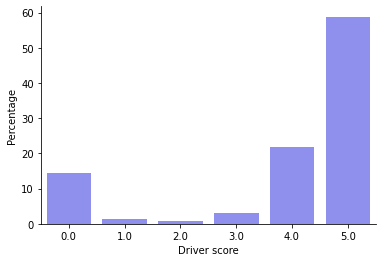

In [220]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine() 
plt.show()

In [223]:
rider_score_counts = (taxi_peru\
    .groupby('rider_score')\
    .agg({'journey_id':'count'})/taxi_peru.groupby('rider_score').agg({'journey_id':'count'}).sum())\
    .rename(columns = {'journey_id':'percentage'})\
    .mul(100).round(2).reset_index().sort_values('rider_score')

In [227]:
#rider_score_counts #оценка водителей(клиентам)

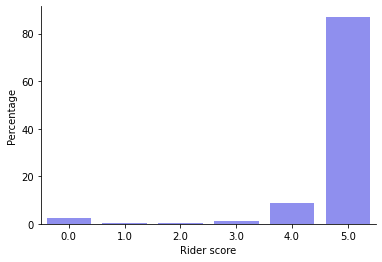

In [226]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine() 
plt.show()